# Introduction to nueral network classcification with TensorFlow

In this notebook we are going to learn how to write neural network for classcification problem

A classcification is where you try to classcify somethiong as one thing or another

A few type of classcification problem
* Binary classcification
* Multiclass classcification
* Multilabel classcification

## Creating date to view and fit

In [ ]:
from sklearn.datasets import make_circles
#  make 1000 example
n_samples =1000

#  create circles
X,y = make_circles(n_samples ,
                   noise =0.03,
                   random_state = 42)


In [ ]:
# check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

The machine learning explorer motto

> "Visualize, Visualize, Visualize"

Its good idea to Visualize  these four things
1. Data
2. Model
3. Training
4. Predictions

Our data is a little hard to understand right now.. lets visualize it !![4.png](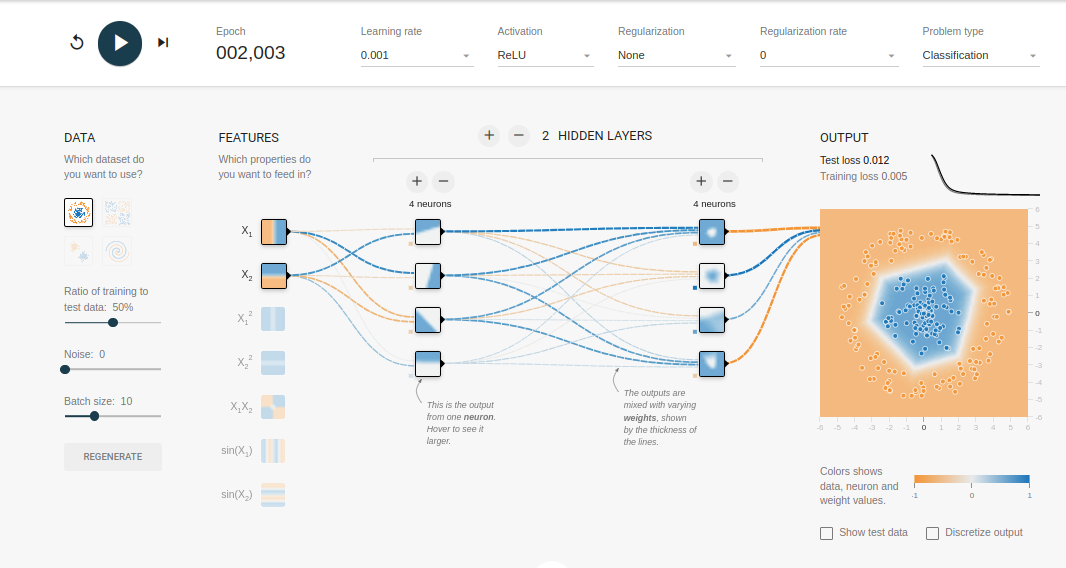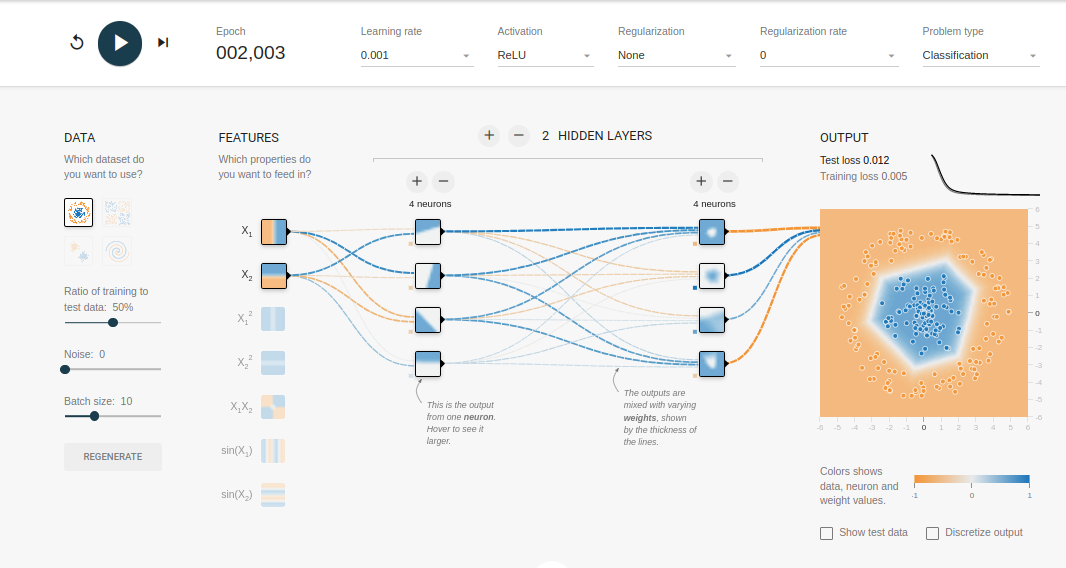)

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


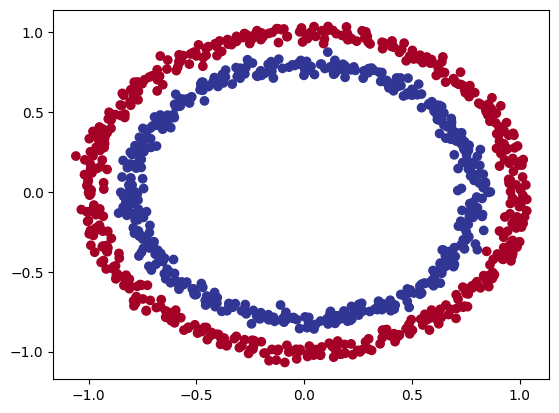

In [ ]:
#  Visulaize with plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1], c=y,cmap = plt.cm.RdYlBu);

 **Exercise:** Before pushing forward spend 10 minutes playing around with [playground tensorflow.org](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.18668&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) building and running differnt neural networks. See what happen when you change different hyperparameters.

## Input and Output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape , y.shape

((1000, 2), (1000,))

In [ ]:
#  How many samples we are working with
len(X) , len(y)

(1000, 1000)

In [ ]:
#  View the first examples of feature and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modeling with tensorflow are typically
1. Create or import a model
2. Compile a model
3. Fit a model
4. Evaluate a model
5. Tweak
6. Evaluate...

In [ ]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
#  Set the random seed
tf.random.set_seed(42)

# 1. Create a model usinf a sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])
# 3. Fit the model
model_1.fit(X,y,epochs = 5)

Epoch 1/5
32/32 [==============================] - 9s 7ms/step - loss: 6.0689 - accuracy: 0.4830
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 5.0874 - accuracy: 0.4460
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 4.6485 - accuracy: 0.4660
Epoch 4/5
32/32 [==============================] - 0s 8ms/step - loss: 4.2585 - accuracy: 0.4720
Epoch 5/5
32/32 [==============================] - 0s 7ms/step - loss: 2.2220 - accuracy: 0.4850


In [ ]:
#  Lets try and improve our model by training for longer...
model_1.fit(X,y,epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we are working on Binary clascification problem and our model is getting around ~50% accuracy... its performing as if it is guessing.

So lets step things up a notch and add an extra layer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])
# 3. Fit the model
model_2.fit(X,y,epochs=100, verbose =0)

In [ ]:
# 4. Evaluate the model
model_2.evaluate(X,y)
# accuracy is 50% as our traing and testing data is same and number of label count 0 and 1 are same

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932579874992371, 0.5]

In [ ]:
circles["label"].value_counts()
#  even number of both labels

1    500
0    500
Name: label, dtype: int64

## Improving our model

Lets look into our bag of tricks to see how we can improve our model.


1. **Creating a model** - here we might add more layer, increase each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change/try different optimization function or perhaps the **learning rate** (the higher the learning rate, the more the  optimizer pushes the model to improve, whereas the lower the learning rate the smaller the steps) of the optimization function
3. **Fitting the  model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more example to learn from).

----
**Commom ways to improve a deep model**
* Adding a layer
* Increase the number of hidden units
* Change the activation function
* Change the optimization fuction
* Change the learning rate
* Fitting on more data
* Fitting for longer

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10),  # add another layer with 10 neurons
  tf.keras.layers.Dense(1),
])
# 2. compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 3. fit the model
model_3.fit(X,y,epochs = 100, verbose =0)

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.5080


[0.6988301873207092, 0.5080000162124634]

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


To visualize our model's prediction, lets create a function `plot_desizion_boundry()`. this function will

* Take in a trained model , features (X)  and labels (y)
* Create a meshgrid of the different X values
* Make prediction across the meshgrid
* Plot the prediction as well as a line between (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundry(model , X, y):
  """
  Plots the decision boundry created by a model predicting on X.
  This function is inspired by two resources:
  1. https://cs231n.github.io/neural-networks-case-study/
  2. https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/09_Data_Quality.ipynb
  3. https://github.com/GokuMohandas/MadeWithML
  """
  # Define the axis boundries of the plot and create a meshgrid
  x_min , x_max = X[:,0].min() - 0.1 , X[:,0].max() + 0.1
  y_min , y_max = X[:,1].min() - 0.1 , X[:,1].max() + 0.1
  xx , yy = np.meshgrid(np.linspace(x_min, x_max,100),
                        np.linspace(y_min, y_max,100),)
  #  Create X value (we are going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multiclass
  if len(y_pred[0]) > 1:
    print("doing multiclass classcification")
    # We have to reshape our prediction to get then ready for ploting
    y_pred = np.argmax(y_pred , axis = 1).reshape(xx.shape)
  else:
    print("doing binary classcification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  # Plot the decisiom boundry
  plt.contourf(xx , yy , y_pred ,cmap = plt.cm.RdYlBu , alpha = 0.7)
  plt.scatter(X[:,0] , X[:,1] , c=y , s=40 , cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min() , xx.max() )
  plt.ylim(yy.min() , yy.max() )

313/313 [==============================] - 1s 2ms/step
doing binary classcification


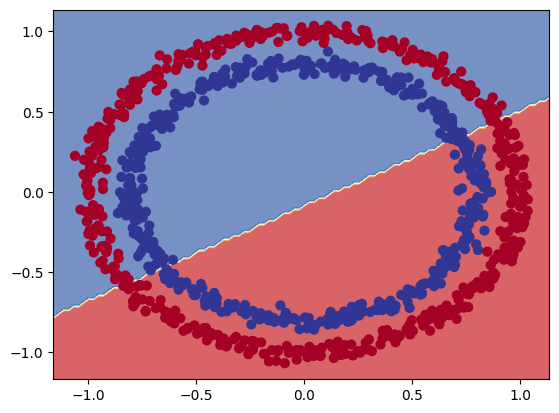

In [ ]:
# Check our predictions our model is making
"""
Model is predicting that disicion biundry is a straight line but out data is circular
we observed linear dicision boundry but our data is non-linear
"""
plot_decision_boundry(model = model_3 , X = X, y = y)

In [ ]:
#  lets see if our model can be used for regression problem
tf.random.set_seed(42)

# Create some data
X_regression = tf.range (0,1000, 5)
y_regression = tf.range (100,1100, 5) # y =X+10

#  Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#  Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),y_reg_train, epochs =100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


Oh wait... we compiled our model for binary classcification problem.

But... we are working on a regression problem, lets change our model to suit our data

In [ ]:
# set up the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model, this time with regression-specific loss function
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

# 3. fit the model
# X_reg_train.shape, y_reg_train.shape
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),y_reg_train, epochs =100)


Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 362.3667 - mae: 362.3668
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 229.2294 - mae: 229.2294
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 100.5601 - mae: 100.5601
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 59.5559 - mae: 59.5559
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 82.1650 - mae: 82.1650
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 58.1075 - mae: 58.1075
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 44.7714 - mae: 44.7714
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 45.3205 - mae: 45.3205
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 42.9885 - mae: 42.9885
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.7412 - mae: 42.7412
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 7ms/step


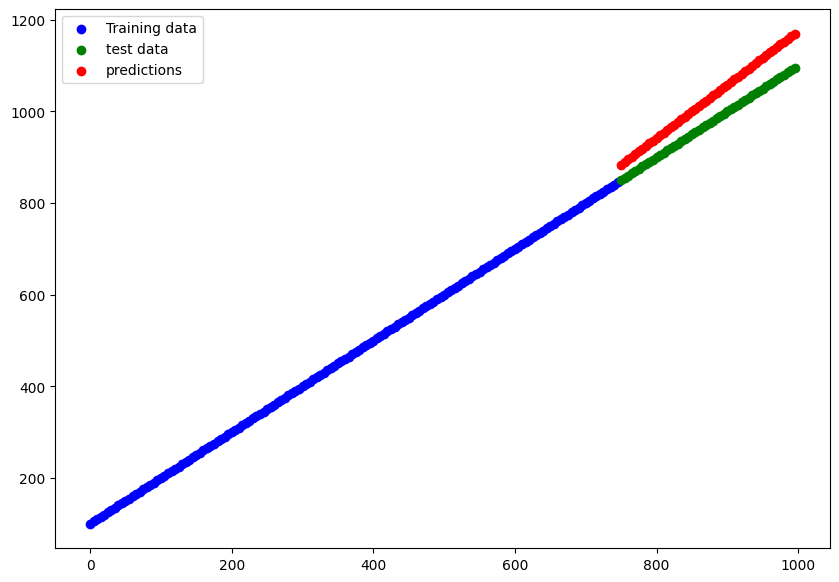

In [ ]:
#  Make prediction with our trained model
y_reg_preds = model_3.predict(X_reg_test)
# PLot the models prediction against our regresion data
plt.figure (figsize =(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b", label ="Training data")
plt.scatter(X_reg_test,y_reg_test,c="g", label ="test data")
plt.scatter(X_reg_test,y_reg_preds,c="r", label ="predictions")
plt.legend();

## The missng piece - Non-linearity

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. create a Model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# compile the model
model_4.compile (loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])
# Fit the model
history = model_4.fit(X,y, epochs =100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2960 - accuracy: 0.4610
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2387 - accuracy: 0.4630
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1871 - accuracy: 0.4650
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1061 - accuracy: 0.4670
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0394 - accuracy: 0.4680
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9961 - accuracy: 0.4670
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9225 - accuracy: 0.4770
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 3.8656 - accuracy: 0.4750
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 3.8609 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 3.8504 - accuracy: 0.4760
Epoch 11/

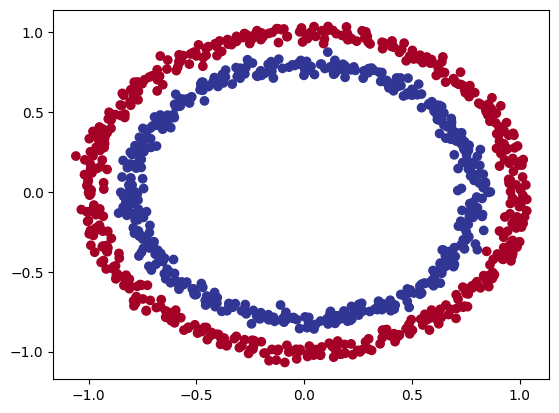

In [ ]:
# Check out our data
plt.scatter(X[:,0],X[:,1], c=y,cmap = plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classcification


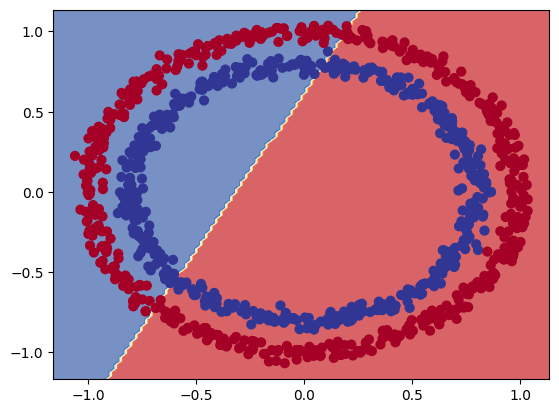

In [ ]:
#  Check the decion boundry for our latest model
plot_decision_boundry(model =model_4,
                      X=X,
                      y=y)

Lets try our first neural network with non-linear activation function

In [ ]:
#  Set random seed
tf.random.set_seed(42)

# 1. create model with non-linear activation function
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,  activation = tf.keras.activations.relu),
])

# 2. compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 3. fit the model
model_5.fit (X,y, epochs =100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.3655 - accuracy: 0.4700
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3347 - accuracy: 0.4730
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2886 - accuracy: 0.4750
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2489 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2176 - accuracy: 0.4710
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1847 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1574 - accuracy: 0.4740
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1234 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1185 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1140 - accuracy: 0.4740
Epoch 11/

Time to replicate the multilayer nueral network from tensorflow playground


![tensorflow playground](https://drive.google.com/file/d/1gCVRFG37j_loAMY7IOwKZQGz56GTTueG/view?usp=sharing)

In [ ]:
#  Set the random seed
tf.random.set_seed(42)

# 1. create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu ),
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])

# 3. fit the model
history = model_6.fit(X,y,epochs = 250)



Epoch 1/250
32/32 [==============================] - 1s 4ms/step - loss: 4.7403 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 4.0058 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 2.1040 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 1.5001 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 1.4352 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 1.3805 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 1.3323 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 1.2881 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 1.2487 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 1.2117 - accuracy: 0.5000
Epoch 11/

In [ ]:
#  Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9230


[0.22101208567619324, 0.9229999780654907]

313/313 [==============================] - 1s 2ms/step
doing binary classcification


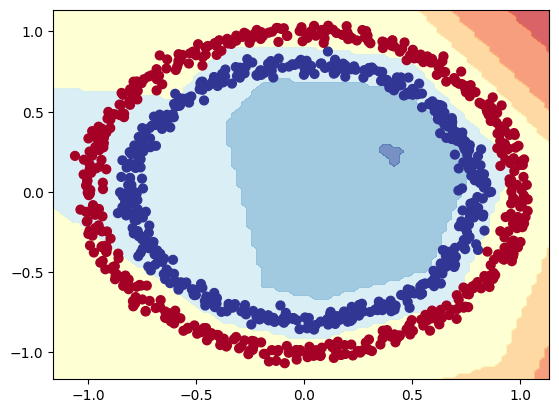

In [ ]:
# How do our model prediction looks?
plot_decision_boundry(model_6, X,y)

In [ ]:
# Set  the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid),
])

# 2. Compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])

# 3. fit the model
model_7.fit(X,y,epochs =100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.6904 - accuracy: 0.4990
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5020
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.5100
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6881 - accuracy: 0.5080
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6876 - accuracy: 0.5100
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6871 - accuracy: 0.5060
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6868 - accuracy: 0.5120
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6863 - accuracy: 0.5130
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6860 - accuracy: 0.5150
Epoch 11/

In [ ]:
#4.  Evaluate the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.2707 - accuracy: 0.9720


[0.27073898911476135, 0.972000002861023]

313/313 [==============================] - 1s 2ms/step
doing binary classcification


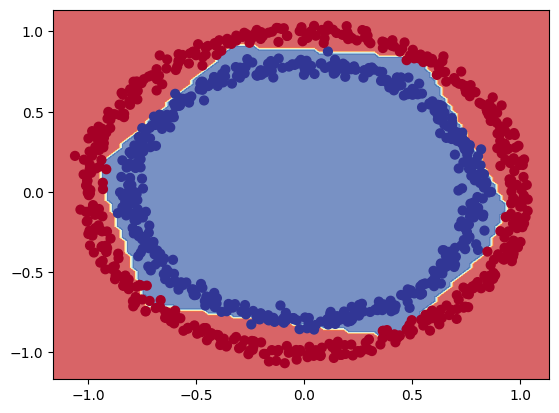

In [ ]:
# Lets visualize our incredible metrics
plot_decision_boundry(model_7,X,y)

❓ **Questions:** Whats wrong with the predictions we have made? Are we really evaluating our model correctly?
Hint: what data the model learn on and what data did we predict on?

🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines ) functions** is one of the key fundamental of neural networks.

Now we are discussed the concept of linear and non-linear functions (or lines ) lets see them action


In [ ]:
# Create a toy tensor (similar to data we pass into our model)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

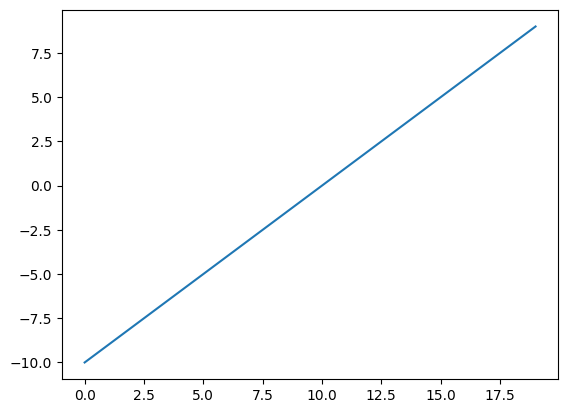

In [ ]:
#  Visualize our toy tensor
plt.plot(A);

In [ ]:
#  lets start by replicating sigmoid -  sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / ( 1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

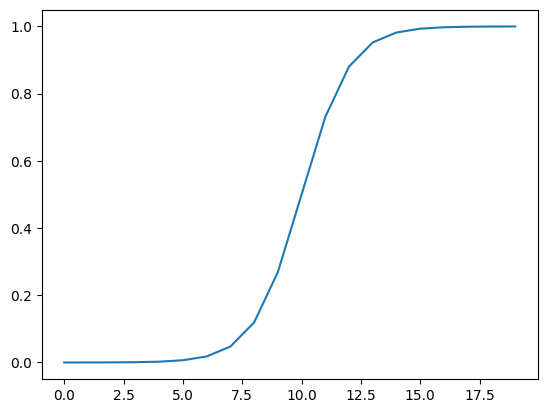

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [ ]:
#  Lets recreate the relu function
def relu(x):
  return tf.maximum(0,x)

#  Pass out toy tensor to our relu function
relu(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

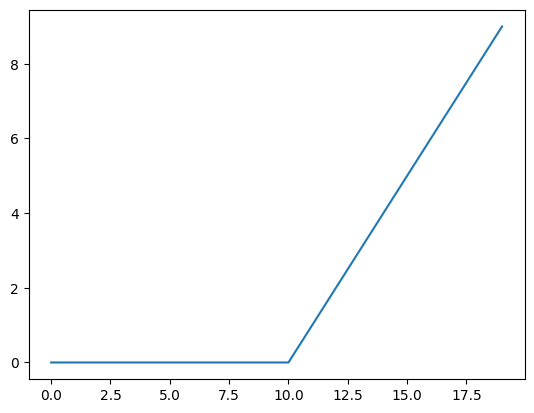

In [ ]:
# Plot Relu-modified function
plt.plot(relu(A))

In [ ]:
#  Let try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

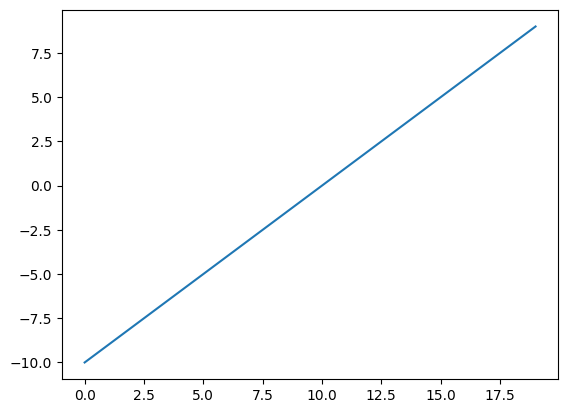

In [ ]:
# Daes the linear activation function function change anything?
plt.plot(tf.keras.activations.linear(A))

In [ ]:
#  Does even change
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

  ## Evaluating and improving our Classcification


  So far we have been training on the same dataset...

  However, in machine learning this is basically a sin
  
  So lets create a training and test set.


In [ ]:
# Check how many examples we have
len(X)

1000

In [ ]:
# Split into train and test sets
X_train ,y_train = X[:800], y[:800]
X_test ,y_test = X[800:], y[800:]
X_train.shape ,X_test.shape,y_train.shape ,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
#  Lets re-create model to fit on the training data and evaluate on the testing data

#  Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,tf.keras.activations.relu),
    tf.keras.layers.Dense(4,tf.keras.activations.relu),
    tf.keras.layers.Dense(1,tf.keras.activations.sigmoid),
])

# 2. compile the model
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs =250)


Epoch 1/250
25/25 [==============================] - 1s 3ms/step - loss: 0.7089 - accuracy: 0.5000
Epoch 2/250
25/25 [==============================] - 0s 3ms/step - loss: 0.7055 - accuracy: 0.4900
Epoch 3/250
25/25 [==============================] - 0s 3ms/step - loss: 0.7033 - accuracy: 0.4538
Epoch 4/250
25/25 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.4462
Epoch 5/250
25/25 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.4787
Epoch 6/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6999 - accuracy: 0.4712
Epoch 7/250
25/25 [==============================] - 0s 5ms/step - loss: 0.6990 - accuracy: 0.4688
Epoch 8/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6984 - accuracy: 0.4638
Epoch 9/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.4688
Epoch 10/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6974 - accuracy: 0.4625
Epoch 11/

In [ ]:
# 4. Evaluate the model
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0714 - accuracy: 0.9900


[0.071353018283844, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classcification
313/313 [==============================] - 1s 2ms/step
doing binary classcification


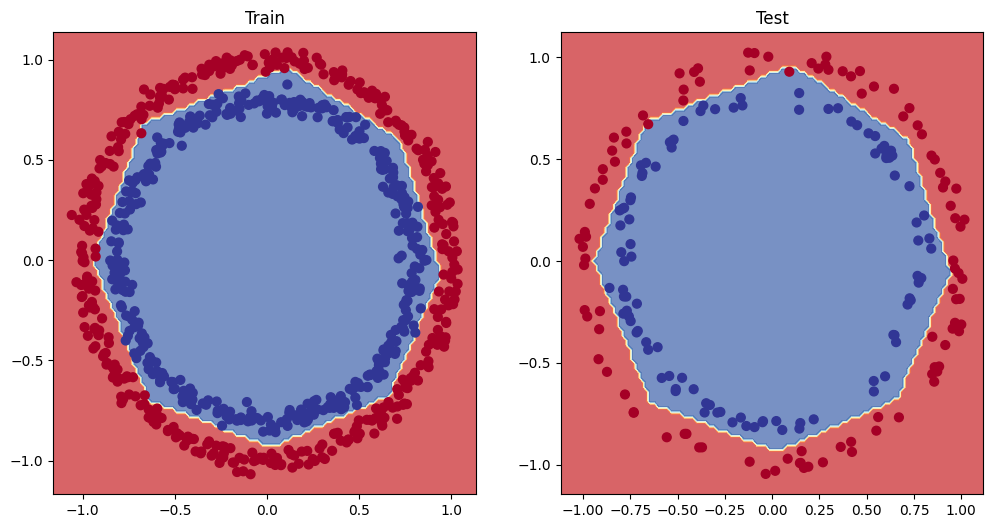

In [ ]:
# Plot the disicion boundries for the training and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundry(model_8 , X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundry(model_8 , X=X_test, y=y_test)

In [ ]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 4)                 12        
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Plot the loss (or training ) curves

In [ ]:
#  Convert the history object into a Dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.708906,0.50000
1,0.705541,0.49000
2,0.703290,0.45375
3,0.701745,0.44625
4,0.700628,0.47875
...,...,...
245,0.077388,0.99625
246,0.076584,0.99625
247,0.076138,0.99750
248,0.075055,0.99750


Text(0.5, 1.0, 'Model 8 loss curves')

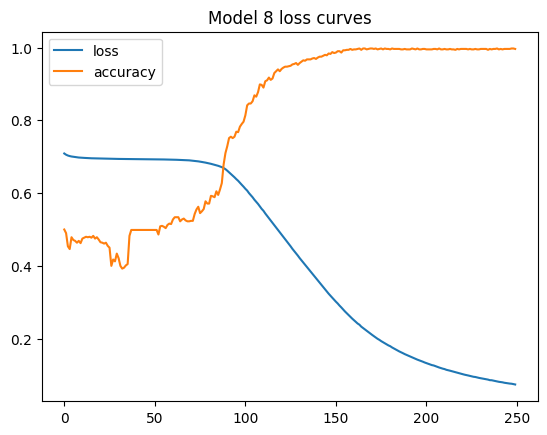

In [ ]:
#  Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model 8 loss curves")

🔑 **Note** For many problem, the loss function going down mean the model is improving (the preictions its making are getting closer to ground truth labels)

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the oss decreases the most during training ) we are going to use the following steps:
* A learning rate **callback** - you can think a callback as an extra piece of functionality, you can add to your  *while* its training.
* Another model (we could use the same one as above, but we are practicing building models here)
*  A modified loss curves plot.

In [ ]:
#  Set the random seed
tf.random.set_seed(42)

# 1. Create a model (same as model 8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid),
])

# 2. compile the model
model_9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# 3. fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs =100, callbacks = [lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6955 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5063 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5025 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5050 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5125 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5138 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

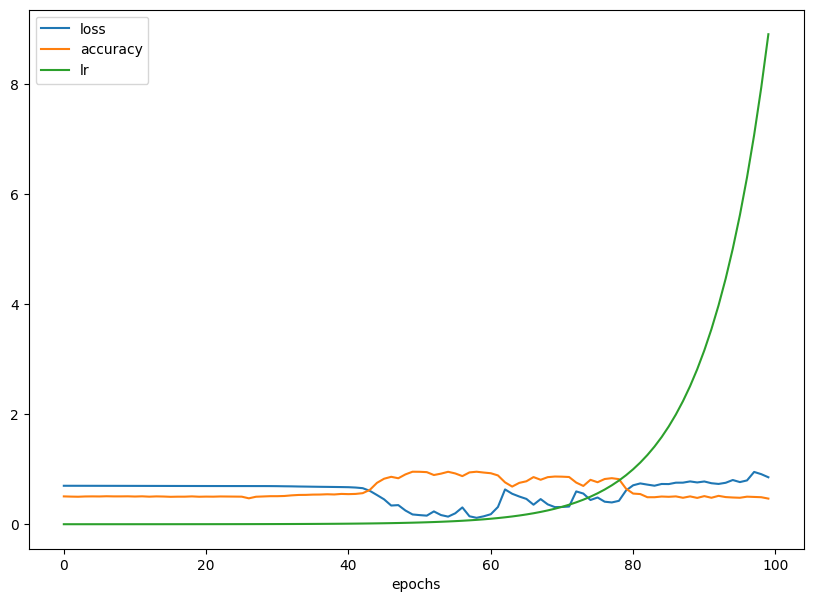

In [ ]:
#  Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel = "epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

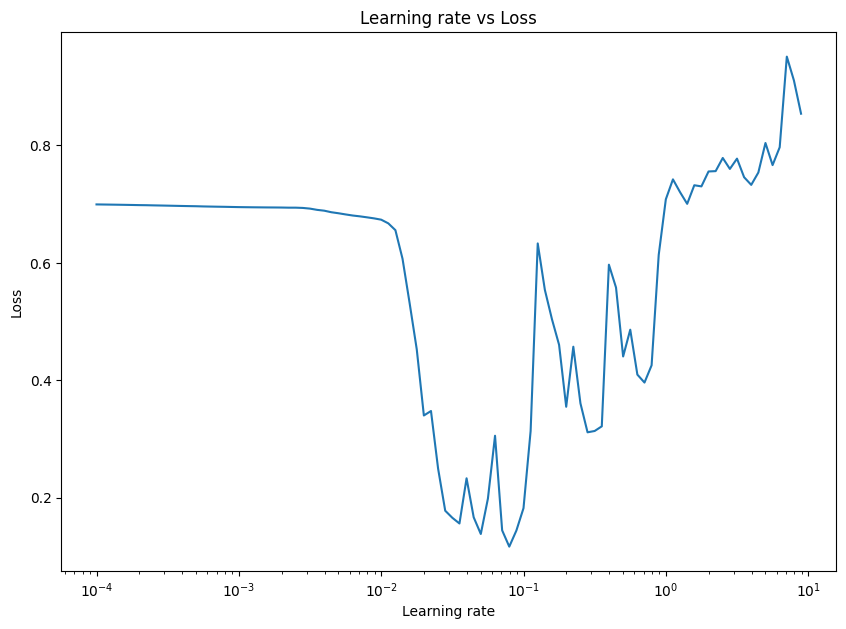

In [ ]:
# plot the learing rate verses the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

🔑 **Note:** learning rate is 10 times smaller then the lowest learning point of learning point verses loss  

In [ ]:
len(lrs)

100

In [ ]:
#  Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Lets try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

# 2. Compile the model with ideal learning rate
model_10.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr = 0.02),
                 metrics = ["accuracy"]
                 )

# 3. Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train , epochs =200)

Epoch 1/200
25/25 [==============================] - 1s 3ms/step - loss: 0.6917 - accuracy: 0.4837
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5013
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5050
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5050
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5175
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5213
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5325
Epoch 8/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5213
Epoch 9/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5138
Epoch 10/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5113
Epoch 11/

In [ ]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3676 - accuracy: 0.8850


[0.36761975288391113, 0.8849999904632568]

In [ ]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1429 - accuracy: 0.9900


[0.14286445081233978, 0.9900000095367432]

🔑 Optimizing learning rate to ideal learning rate help model 10 (lr = 0.02, epoch = 200) to train earlier then model 8 (lr = 0.01 ,epoch =250)

313/313 [==============================] - 1s 1ms/step
doing binary classcification
313/313 [==============================] - 0s 1ms/step
doing binary classcification


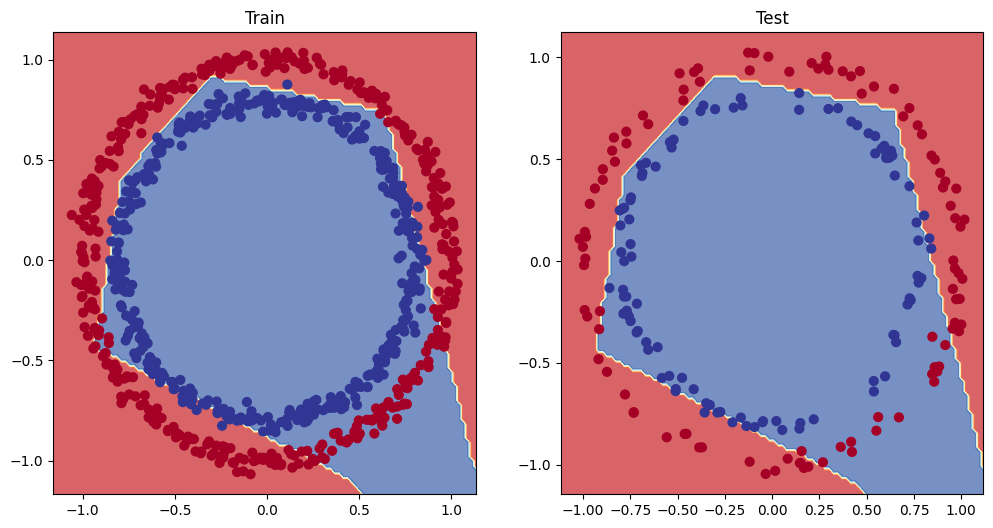

In [ ]:
# Plot the decision boundry for the training and test sets
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title ("Train")
plot_decision_boundry(model_10,X=X_train , y=y_train )
plt.subplot(1,2,2)
plt.title ("Test")
plot_decision_boundry(model_10,X=X_test , y=y_test )

**Classcification evaluation methods**
* **Accuracy**

  Default metric for classification
problems. Not the best for
imbalanced classes.

* **Precision**
  
  Higher precision leads to less false
positives
* **Recall**

  Unfortunately, you canot have both precision and recall high. If you increase precision, it will reduce recall, and vice versa. This is called the  precision/recall tradeoff
* **F1 Score**

  Combination of precision and recal, usually a good overall metric for a classification model

* **Confusion matrix**

  When comparing predictions to truth labels to see where model gets confused. Can be hard to use with large numbers of classes.

## More classcification evaluation methods
Alongside visualizing our models results as much as possible, there are handful of other classcification evaluation methods and metrix you should be fimiliar with:
* Accuracy
* Precision
* Recall
* F1-scorce
* Confusion matrix
* classcification report (from sikt-learn)

In [ ]:
# Check the accuracy of the model
loss , accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test sets:{loss}")
print(f"Model accuracy on the test sets: {(accuracy*100):2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.3676 - accuracy: 0.8850
Model loss on the test sets:0.36761975288391113
Model accuracy on the test sets: 88.499999%


How abou a confusion matrix?

Anatomy of a confusion matrix
* y -axis : True label
* x -axis : Predicted label

In [ ]:
#  Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[0.77449745],
       [0.77449745],
       [0.77449745],
       [0.77449745],
       [0.28545752],
       [0.0731829 ],
       [0.6425325 ],
       [0.19849508],
       [0.60411245],
       [0.08136415]], dtype=float32)

Oops.. looks like our prediction array has come out in **prediction probability** form. The sigmoid (or softmax) activation functions.

Any thing greater then 0.5 is **1** and less then 0.5 is **0**

In [ ]:
#  Convert prediction to binary format and view the first 10
tf.round(y_preds[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
#  Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[85, 16],
       [ 7, 92]])

 How about we pretify our confusion mtrix

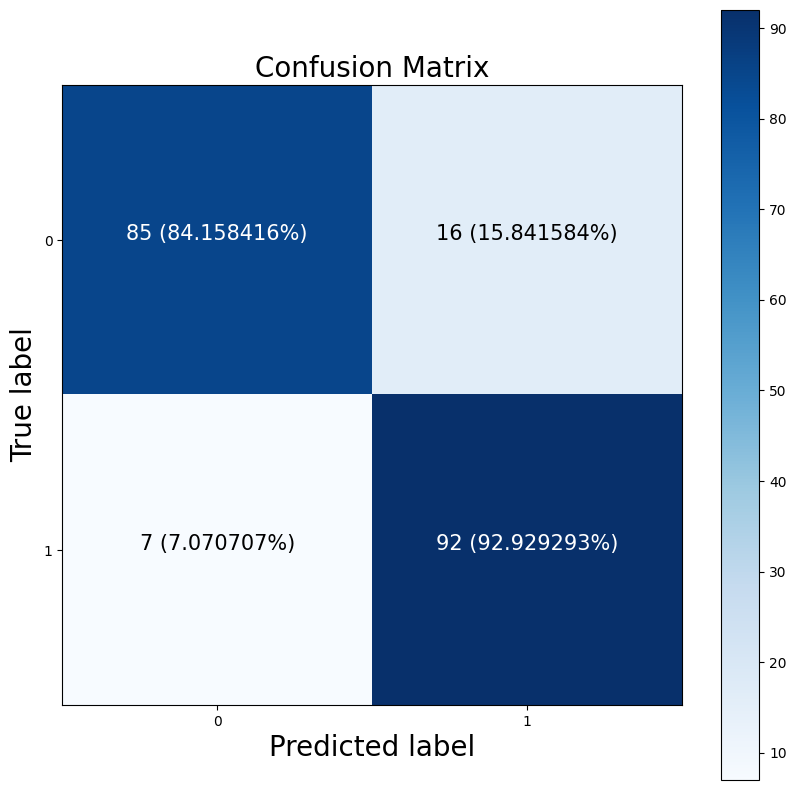

In [ ]:
#  Note: the confusion metrix code we are about to write is a  remix of sklearn's plot_confusion_matrix function

import itertools
figsize = (10, 10)

#  Create the confusion metrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis = 1)[:,np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

#  Lets pretify it
fig ,ax =plt.subplots(figsize = figsize)
# Create a matrix plot
cax = ax.matshow(cm , cmap = plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes :
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title = "Confusion Matrix",
       xlabel = "Predicted label",
       ylabel = "True label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# Set the a-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)



#  Set threshold for difference colors
threshold = (cm.max() + cm.min()) /2

#  Plot the text on each cell

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:1f}%)",
           horizontalalignment = "center" ,
           color = "white" if cm[i,j]> threshold else "black",
           size = 15)


# Working with a larger example (multiclass classcification)

When you have more than two classes as an option, it's  known as **multiclass classcification**
* This means if you have 3 different classes, it's multiclass classcification
* It also means if you have 100 different classes, it's a multiclass classcification.

To practice multi-class classcification, we are going to build a neural network to classcify images of differnt items of clothings.

* [tensorflow fashion mnist dataset](
https://www.tensorflow.org/datasets/catalog/fashion_mnist)

* [Git hub tensorflow fashion mnist dataset](https://github.com/zalandoresearch/fashion-mnist)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import  fashion_mnist

# The data has alreday been sorted into training and test sets for us
(train_data , train_labels), (test_data , test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample\n{train_data[0]}\n")
print(f"Training label\n{train_labels[0]}\n")

Training sample
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

In [ ]:
#  Check the shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

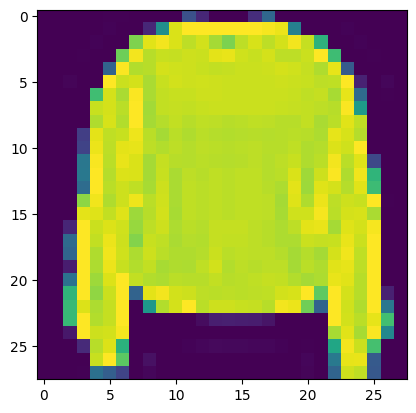

In [ ]:
# Plot the single label
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
#  Check out the sample label
train_labels[7]

2

In [ ]:
#  Create a small list so we can list onto our training label  so they are human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len (class_names)


10

Text(0.5, 1.0, 'Coat')

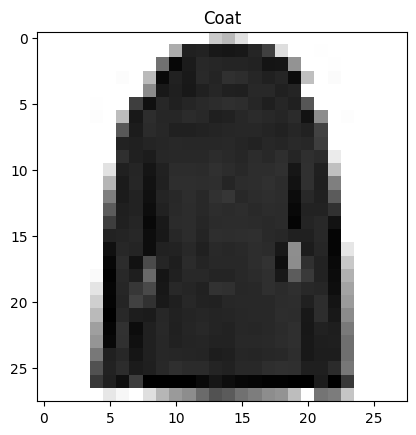

In [ ]:
#  Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

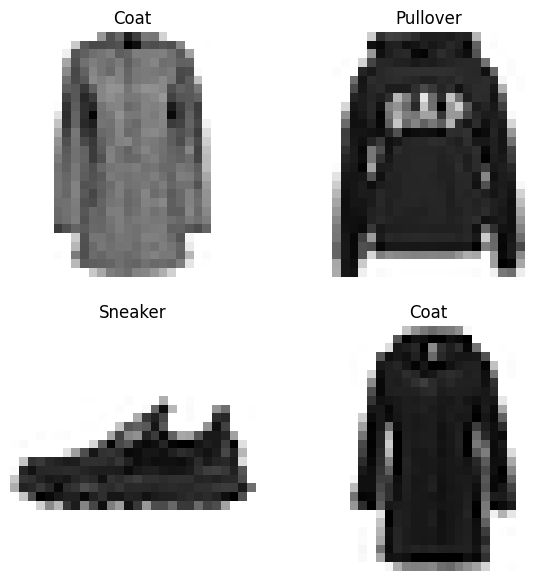

In [ ]:
#  Plot multiple random images of fashon MINIST
import random
plt.figure(figsize=(7,7))
for  i in range (4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow (train_data[rand_index], cmap =plt.cm.binary )
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classcification model

For our multiclass classcification model, we can use a similar  architecture to our binary classcifiers, however, we are going to have to tweek a few things:

* Input shape = 28 x 28 (the shape of one image)
* Output shape =10 (one per class of clothing)
* Loss function = tf.keras.losses.tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategorialCrosentropy()
  * If your labels are integer form use SparseCategorialCrosentropy()
* Output layer activation softmax(not sigmoid)


In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
# Our data needs to be flattened (from 28 x 28  to None,784)
flatten_model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
#  Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation =  tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax),
])

# 2. compile a model
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])



#  3. fit the model
non_norm_history=model_11.fit(train_data,
                              train_labels,
                              epochs=10,
                              validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3921 - accuracy: 0.0974 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_data.min(), train_data.max()

(0, 255)

In [ ]:
#  Using the classes in one-hot encoding forms
# Set random seed
tf.random.set_seed(42)

# 1. create a model
model_11_1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])
# 2. Compile a model
model_11_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#  3. fit the model
non_norm_history_11_1=model_11_1.fit(train_data,
                              tf.one_hot(train_labels,depth=10),
                              epochs=10,
                              validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3619 - accuracy: 0.1431 - val_loss: 2.0632 - val_accuracy: 0.1802
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0087 - accuracy: 0.1917 - val_loss: 1.8505 - val_accuracy: 0.2232
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7520 - accuracy: 0.2553 - val_loss: 1.7092 - val_accuracy: 0.2498
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6861 - accuracy: 0.2632 - val_loss: 1.6708 - val_accuracy: 0.2604
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.6577 - accuracy: 0.2757 - val_loss: 1.6060 - val_accuracy: 0.3180
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5786 - accuracy: 0.3195 - val_loss: 1.5540 - val_accuracy: 0.3523
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5473 - accuracy: 0.3314 - val_loss: 1.5366 - val_accuracy:

**Normalization /  Scaling**
Neural Network prefer data to be scaled (or normalized ) , this means they like to have numbers in the tensors they try to find patterns between 0 and 1 .

In [ ]:
#  We can get our training and test data between 0 and 1 by dividing by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# check the min and max values of the scaled training data
train_data_norm.min() ,train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalized, lets build a model to find patterns in it
#  Using the classes in one-hot encoding forms
#  Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation =  tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax),
])

# 2. compile a model
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])



#  3. fit the model
norm_history=model_12.fit(train_data_norm,
                              train_labels,
                              epochs=10,
                              validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1978 - accuracy: 0.5751 - val_loss: 0.8320 - val_accuracy: 0.7269
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7517 - accuracy: 0.7352 - val_loss: 0.7234 - val_accuracy: 0.7439
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6759 - accuracy: 0.7511 - val_loss: 0.6762 - val_accuracy: 0.7575
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6372 - accuracy: 0.7616 - val_loss: 0.6508 - val_accuracy: 0.7613
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6170 - accuracy: 0.7657 - val_loss: 0.6439 - val_accuracy: 0.7565
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6010 - accuracy: 0.7701 - val_loss: 0.6306 - val_accuracy: 0.7665
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5913 - accuracy: 0.7739 - val_loss: 0.6437 - val_accuracy:

> 🔑 **Note:** Neural network tend to prefer data in numerical form as well as scaled/ normalized (numbers between 0 & 1)

<Axes: title={'center': 'Normalized data'}>

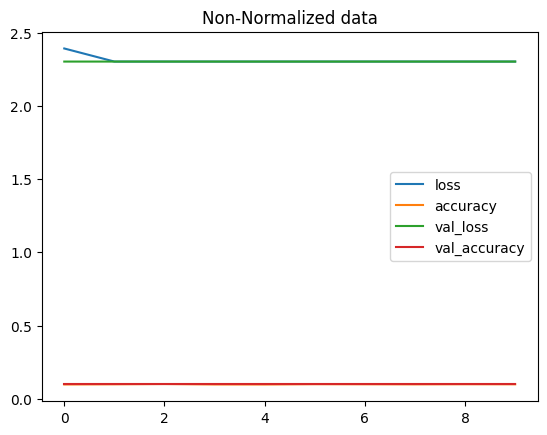

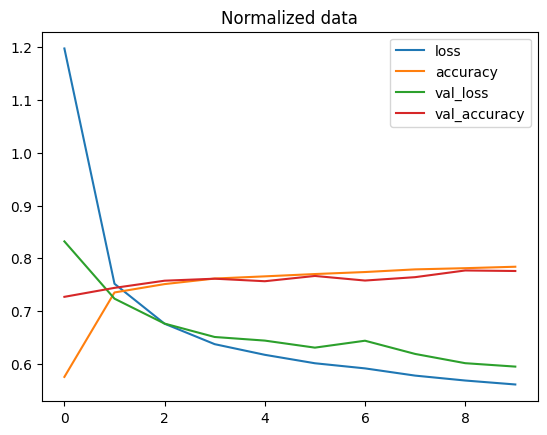

In [ ]:
import pandas as pd
#  Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized data")
#  Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you are comparing model, its important to make sure you are comapring them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [ ]:
#  Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_13 =tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax),
])
# 2. Compile the model
model_13.compile( loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["accuracy"]
)
#  Create a learning rate callback
lr_scheduler  = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
#  3. fit the model
find_lr_history = norm_history=model_13.fit(train_data_norm,
                              train_labels,
                              epochs=40,
                              validation_data=(test_data_norm,test_labels),
                                            callbacks =[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1370 - accuracy: 0.5487 - val_loss: 0.7747 - val_accuracy: 0.7154 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7014 - accuracy: 0.7439 - val_loss: 0.6884 - val_accuracy: 0.7619 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6214 - accuracy: 0.7790 - val_loss: 0.6396 - val_accuracy: 0.7717 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5981 - accuracy: 0.7858 - val_loss: 0.6337 - val_accuracy: 0.7786 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5868 - accuracy: 0.7886 - val_loss: 0.6186 - val_accuracy: 0.7827 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5809 - accuracy: 0.7920 - val_loss: 0.6396 - val_accuracy: 0.7777 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal learning rate')

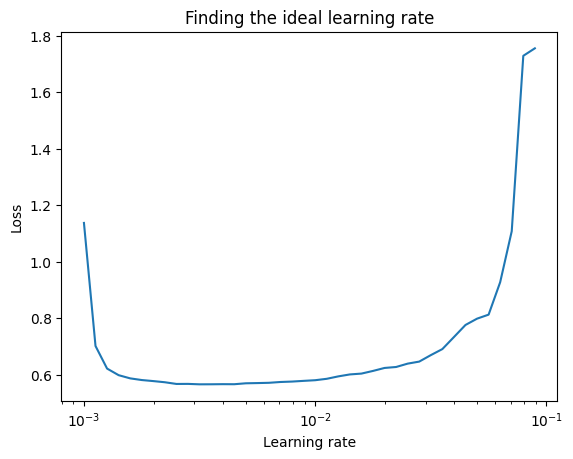

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
10**-3

0.001

In [ ]:
# Lets refit a model with the ideal learning rate

#  Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_14 =tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax),
])
# 2. Compile the model
model_14.compile( loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                  metrics = ["accuracy"]
)

#  3. fit the model
history_14 = model_14.fit(train_data_norm,
                              train_labels,
                              epochs=20,
                              validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 1.2505 - accuracy: 0.5259 - val_loss: 0.8317 - val_accuracy: 0.6618
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7416 - accuracy: 0.7084 - val_loss: 0.6874 - val_accuracy: 0.7482
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6198 - accuracy: 0.7704 - val_loss: 0.6183 - val_accuracy: 0.7610
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5849 - accuracy: 0.7866 - val_loss: 0.6071 - val_accuracy: 0.7737
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5650 - accuracy: 0.8013 - val_loss: 0.5967 - val_accuracy: 0.7946
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5485 - accuracy: 0.8117 - val_loss: 0.5751 - val_accuracy: 0.8048
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5393 - accuracy: 0.8143 - val_loss: 0.5683 - val_accuracy

## Evaluating our multi-class classcification model
To Evaluate our multiclass classcification model we could :
*  Evaluate its performance using classcification metrics (such as confusion matrix)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Lets fo through the top 2 ...


In [ ]:

# Note : the confusion materix code we are about to write is a remix of scikit-learn's plot_confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/metrics/_plot/confusion_matrix.py#L443
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_metrics(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):

  # Create the confusion materix
  cm=confusion_matrix(y_true,y_pred)
  cm_normal=cm.astype ("float")/cm.sum(axis=1)[:,np.newaxis] # normalize our confusion metrix
  n_classes =cm.shape[0]

  # Lets pretiffy it
  fig, ax=plt.subplots(figsize=figsize)

  #  create a matrixs plot
  cax=ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set label to be classes
  if classes :
    labels=classes
  else:
    labels=np.arange (cm.shape[0])

  # label the axis
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Ste x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust labels size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set the thresh hold for different colors
  threshold=(cm.max()+cm.min())/2.

  # Plot the text in each cell
  for i ,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]}({cm_normal[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j]>threshold else "black",
            size=text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm)# probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.3644197e-06, 6.6066063e-14, 1.7263835e-07, 3.1301862e-08,
        3.6660276e-12, 2.6712957e-01, 7.6322353e-09, 1.4969395e-01,
        2.2012589e-04, 5.8295476e-01],
       [1.0964378e-03, 6.1389188e-10, 9.1633129e-01, 2.6007123e-05,
        1.5116416e-02, 4.2354390e-16, 4.1401096e-02, 0.0000000e+00,
        2.6028823e-02, 4.5686201e-26],
       [2.2980011e-08, 9.9926120e-01, 2.1425569e-06, 1.6245739e-04,
        5.5311655e-04, 2.3665724e-13, 5.8338678e-08, 5.1351925e-37,
        2.1006885e-05, 2.5105439e-29],
       [6.4209416e-08, 9.9864978e-01, 3.8747982e-07, 1.0409661e-03,
        3.0768174e-04, 1.9052133e-14, 7.1486646e-08, 0.0000000e+00,
        1.0809712e-06, 1.5659336e-29],
       [1.7609914e-01, 1.3245645e-07, 1.3448675e-01, 7.1673710e-03,
        7.7835587e-03, 4.3899662e-10, 6.7370826e-01, 6.1478562e-26,
        7.5487193e-04, 1.6463794e-13]], dtype=float32)

In [ ]:
test_data[0], test_data_norm[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0

> **Note** Remember to make predictions on the same kind of data your model is trained on (e.g. if you your model is trained on normalized data, you will want to make prediction on normalized data)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]) , class_names[tf.argmax(y_probs[0])]

(array([1.3644197e-06, 6.6066063e-14, 1.7263835e-07, 3.1301862e-08,
        3.6660276e-12, 2.6712957e-01, 7.6322353e-09, 1.4969395e-01,
        2.2012589e-04, 5.8295476e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

#  View the first 10 predictions
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[704,   2,  26,  75,   4,   4, 165,   0,  18,   2],
       [  3, 942,   4,  36,  10,   0,   4,   0,   1,   0],
       [ 22,   3, 716,   9, 122,   0, 110,   0,  18,   0],
       [ 37,   7,  18, 852,  30,   4,  41,   0,  11,   0],
       [  1,   3, 138,  37, 693,   0, 120,   0,   8,   0],
       [  0,   0,   0,   0,   0, 901,   0,  56,   8,  35],
       [141,   3, 145,  41,  87,   4, 562,   0,  17,   0],
       [  0,   0,   0,   0,   0,  24,   0, 952,   0,  24],
       [  6,   2,  34,  11,   3,  16,   7,   4, 917,   0],
       [  1,   0,   0,   0,   0,  24,   0,  58,   3, 914]])

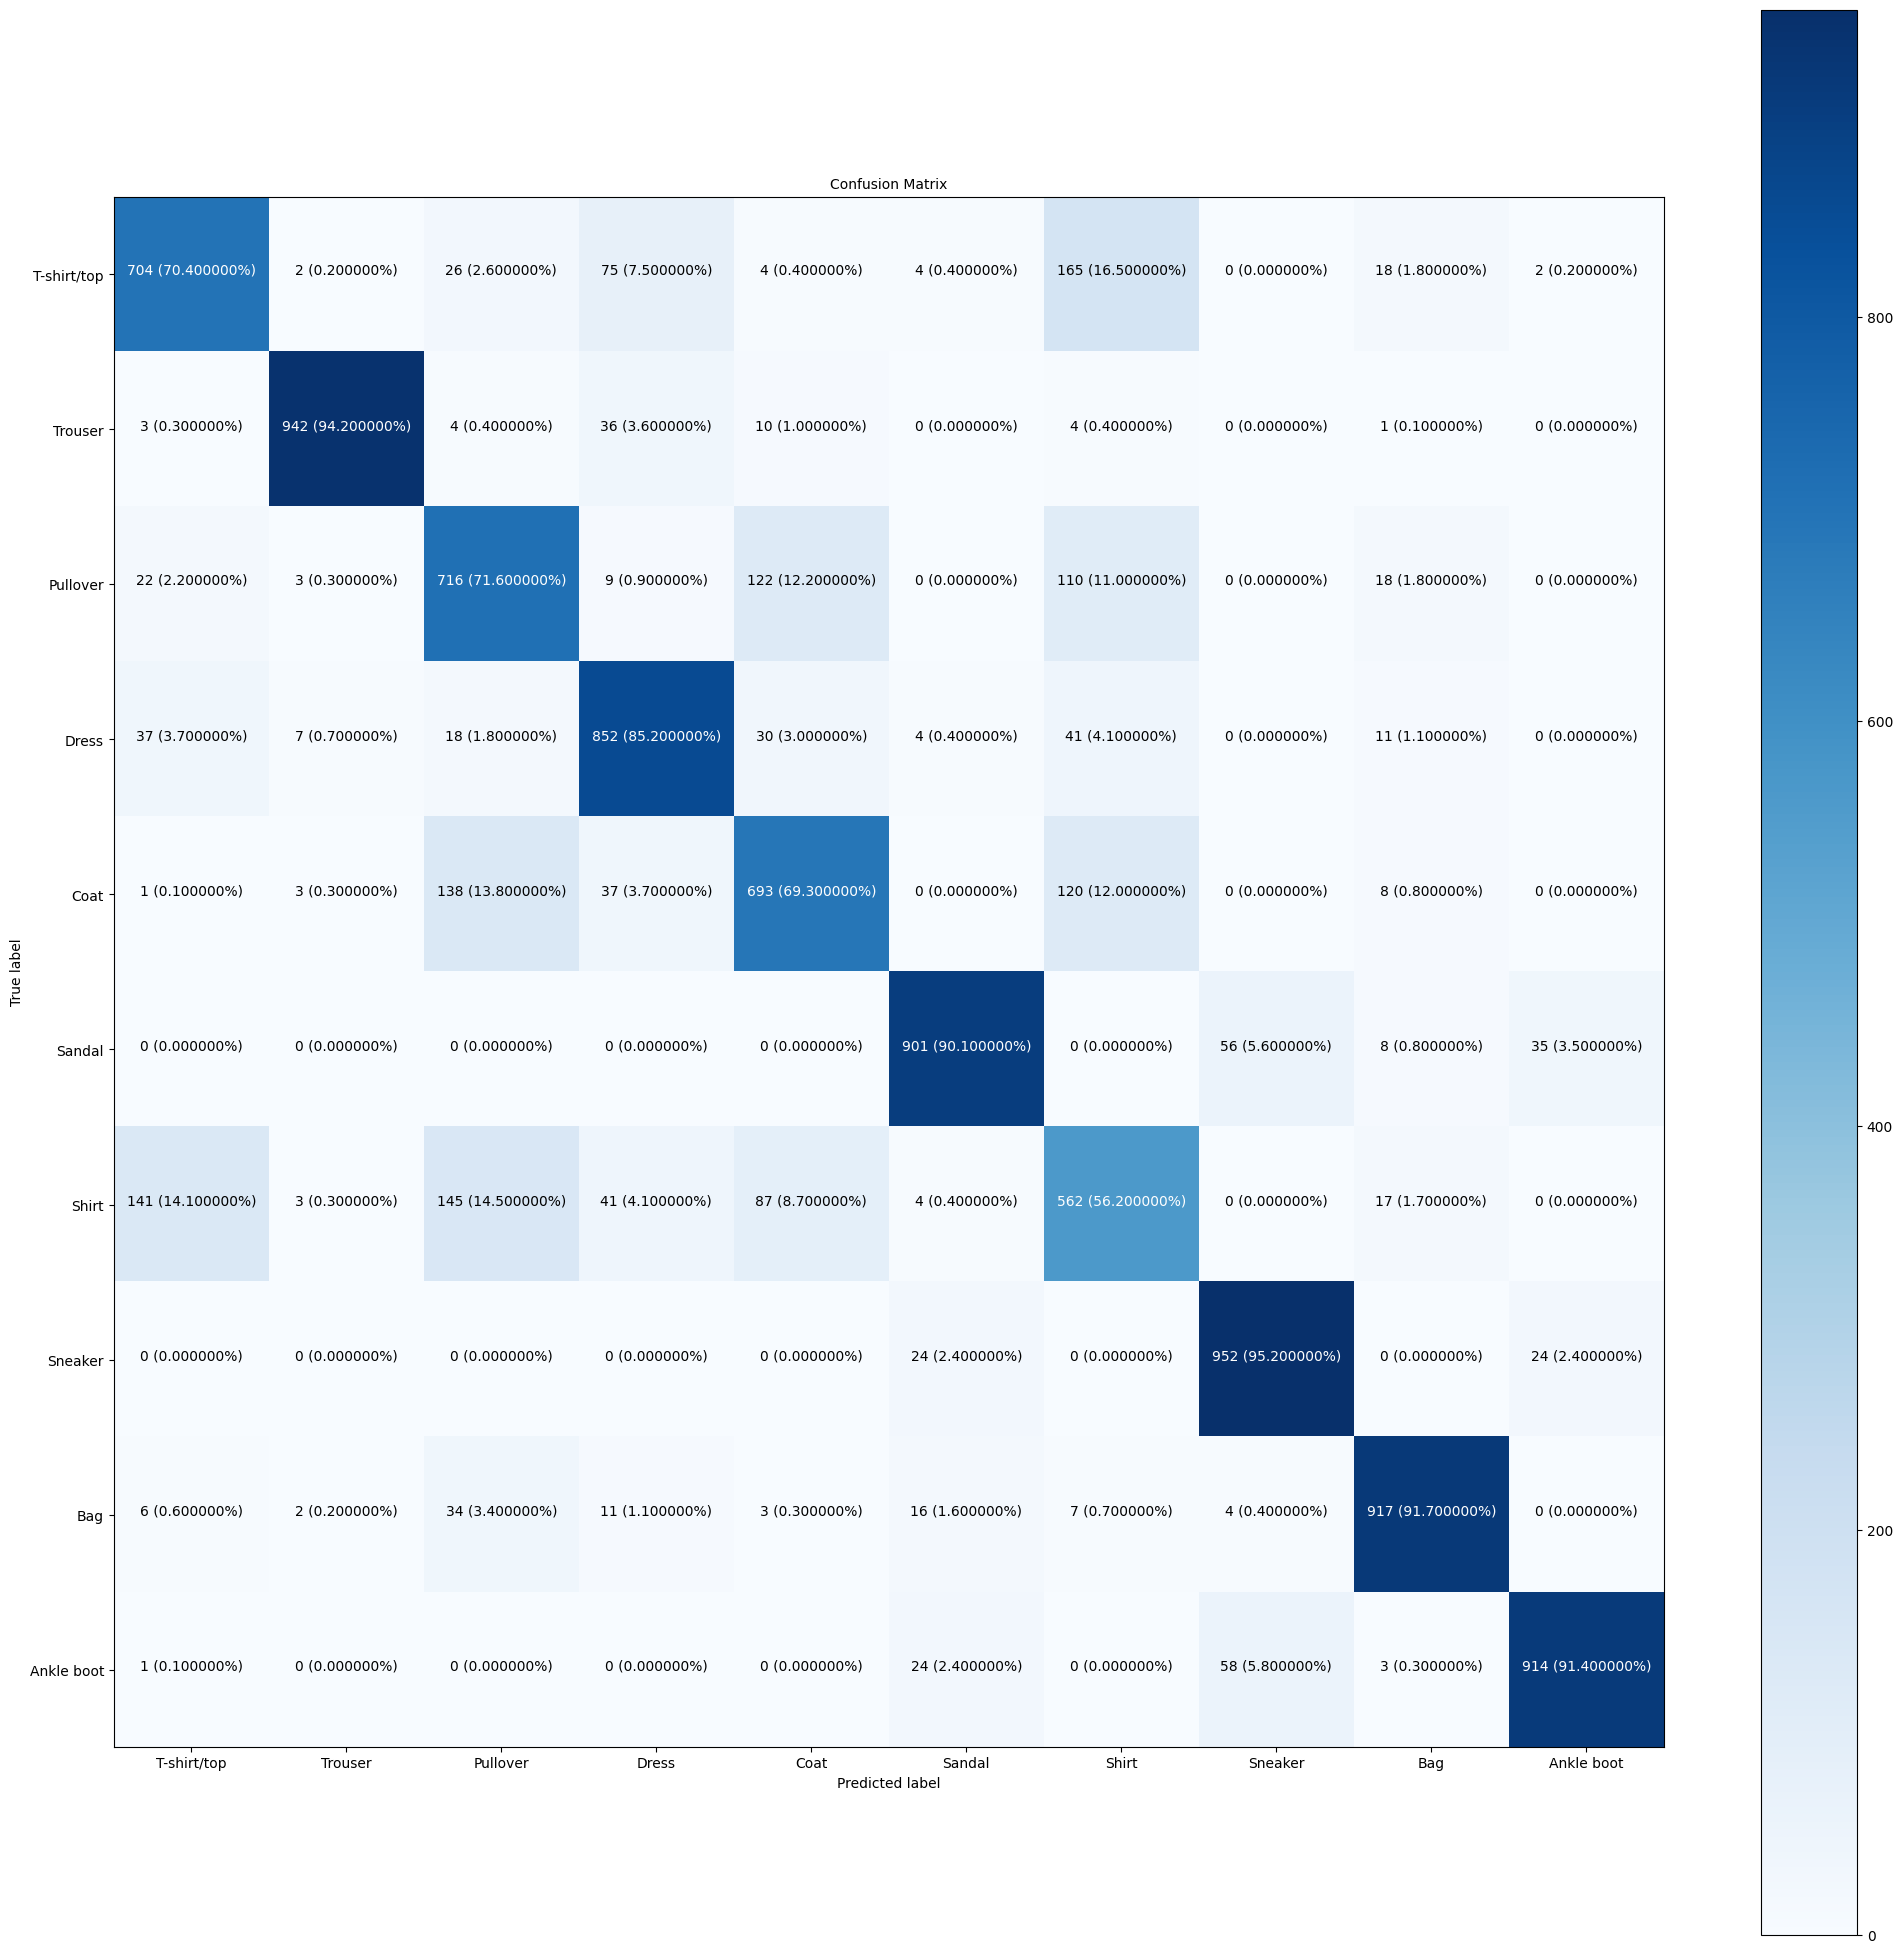

In [ ]:
#  Make a prettier confusion matix
make_confusion_matrix(y_true=test_labels,
                      y_pred = y_preds,
                      classes = class_names,
                      figsize = (25,25),
                      text_size =10)

> 🔑 **Note**: Often when working with images and other forms of visual data, its a good idea to visualize as much as possible to develop futher understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:

* Plot a random image
* Make prediction on said image
* Label a plot with truth label & prediction label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plot it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0,len(images))

  # Create a prediction and tergets
  target_image = images[i]
  preds_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes [preds_probs.argmax()]
  true_label = classes [true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap= plt.cm.binary)

  # change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction / true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(preds_probs),
                                                   true_label),
             color=color)# set the color to green or red based on if prediction is right or wrong




1/1 [==============================] - 0s 17ms/step


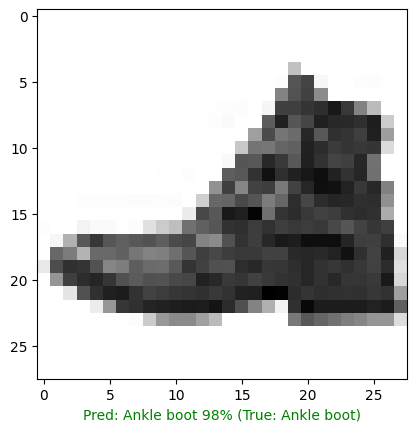

In [ ]:
#  Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What pattrens is our model learning?

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of the layers
weights , biases = model_14.layers[1].get_weights()

# weights
weights , weights.shape

(array([[ 0.43037593, -0.21121736, -0.62335664,  0.80979717],
        [ 0.38408715, -1.1994057 ,  0.04099028,  0.3644976 ],
        [ 0.33881122, -0.46286783, -0.8653083 ,  0.961524  ],
        ...,
        [-0.59304464,  0.02348764, -0.1125236 ,  0.03501775],
        [-0.09038191,  0.1194658 , -0.54329675, -0.54322153],
        [ 0.7393382 , -0.16056891, -0.4450336 ,  0.38909513]],
       dtype=float32),
 (784, 4))

In [ ]:
28 * 28

784

In [ ]:
model_14.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 4)                 3140      
                                                                 
 dense_39 (Dense)            (None, 4)                 20        
                                                                 
 dense_40 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now lets check out the bias vector

In [ ]:
# biases and biases shape
biases ,  biases.shape

(array([0.43219948, 0.32502213, 0.5275153 , 0.683531  ], dtype=float32), (4,))

Every neuron has bias vector . Ecah of these is paired with a weights matrix

The Bias vector get initialized as zeros (atleast in the case of a TensorFlow Dense layer ).

The Bias vector dictates how much the pattern within the corresponding weights matix should influence the next layer

In [ ]:
model_14.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 4)                 3140      
                                                                 
 dense_39 (Dense)            (None, 4)                 20        
                                                                 
 dense_40 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


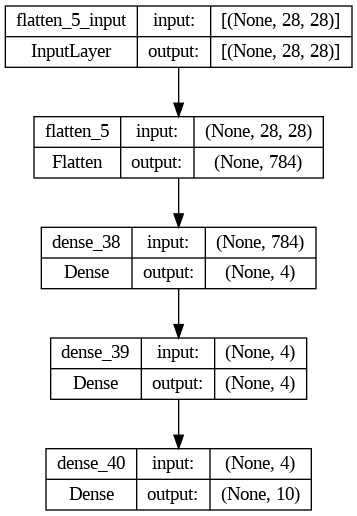

In [ ]:
# Lets check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14,show_shapes=True )

[Next: check out exercises and extra curriculum](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/README.md#-02-neural-network-classification-with-tensorflow-exercises)